## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [114]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [115]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [116]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [117]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [118]:
(df.converted==True).mean()


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [119]:
df.query("group=='treatment'and landing_page != 'new_page'").count()[0]

1965

f. Do any of the rows have missing values?

In [120]:
df.isnull().count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [121]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2= df.query("group == 'control' and landing_page == 'old_page' or group == 'treatment' and landing_page == 'new_page'")
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [122]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [123]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [124]:
duplicate=df2[df2.user_id.duplicated()]


c. What is the row information for the repeat **user_id**? 

In [125]:
duplicate

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [126]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
remove_duplic = df2.drop_duplicates(subset=['user_id'],inplace=True)



# Check again if the row with a duplicate user_id is deleted or not
duplicate=df2[df2.user_id.duplicated()]
duplicate

C:\Users\LAPTOP\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,user_id,timestamp,group,landing_page,converted


In [127]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [128]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [129]:
(df2.converted ==True).sum()/df2['converted'].count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [130]:
conv_control_df = df2.query("group == 'control' and converted == True")
control_df = df2.query("group == 'control'")

prob_control = conv_control_df.user_id.nunique()/control_df.user_id.nunique()

prob_control


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [131]:
# Get dataframe with all records from experiment group
conv_treatment_df = df2.query("group == 'treatment' and converted == True")
treatment_df = df2.query("group == 'treatment'")

prob_treatment = conv_treatment_df.user_id.nunique()/treatment_df.user_id.nunique()

prob_treatment

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later. 

In [132]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = prob_treatment-prob_control
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [133]:
newpage_land=df2.query("landing_page == 'new_page'")

newpage_prob=newpage_land.user_id.nunique()/df2.user_id.nunique()

newpage_prob


0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**its almost the same as the old page, even the proabaility of visiting the old page is slightly higher, so there is no huge difference **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

                                             H_0: P_old ≥ P_new
                                             H_1: P_old < P_new

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [134]:
p_new = df2.query("converted == True").user_id.nunique()/df2.user_id.nunique()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [135]:
p_old = df2.query("converted == True").user_id.nunique()/df2.user_id.nunique()
p_old

0.11959708724499628

In [136]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups under the null.
obs_diff = p_new-p_old
obs_diff

0.0

c. What is $n_{new}$?

In [137]:
conv_treatment_df = df2.query("landing_page == 'new_page'")
num_new = conv_treatment_df.user_id.nunique()
num_new


145310

d. What is $n_{old}$?

In [138]:
conv_control_df = df2.query("landing_page == 'old_page'")
num_old = conv_control_df.user_id.nunique()
num_old
    

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [139]:
new_page_converted = np.random.choice([0,1],num_new,p=(p_new,1-p_new))
new_page_converted

array([1, 1, 0, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [140]:
old_page_converted = np.random.choice([0,1],num_old,p=(p_old,1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [141]:
obs_diff = new_page_converted.mean()-old_page_converted.mean()
obs_diff

0.0006625519535510271

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [142]:
diffs = []
size = df2.shape[0]
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],num_new,p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],num_old,p=(p_old,1-p_old))
    diffs.append(new_page_converted.mean()-old_page_converted.mean())
    
    
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  12.,  129.,  574., 1655., 2885., 2700., 1474.,  459.,  101.,
          11.]),
 array([-4.49225400e-03, -3.58235997e-03, -2.67246593e-03, -1.76257190e-03,
        -8.52677860e-04,  5.72161748e-05,  9.67110210e-04,  1.87700424e-03,
         2.78689828e-03,  3.69679231e-03,  4.60668635e-03]),
 <BarContainer object of 10 artists>)

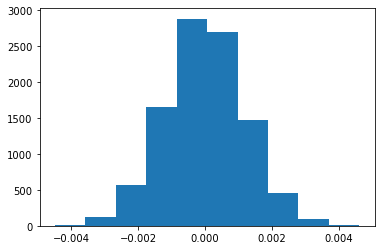

In [143]:
p_diffs = np.array(diffs)
plt.hist(p_diffs)


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [144]:
# Create number of users with all new_page users and all new_page users
convert_new = df2.query("group == 'treatment' and converted == True").user_id.nunique()
convert_old = df2.query("group == 'control' and converted == True").user_id.nunique()
act_new = convert_new/num_new
act_old = convert_old/num_old



In [145]:
obs_diff = act_new - act_old
obs_diff

-0.0015782389853555567

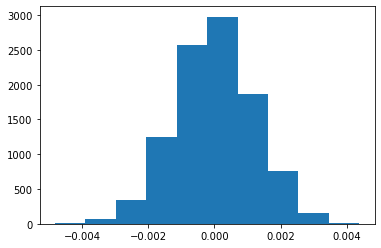

In [146]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

# Plot the null distribution
plt.hist(null_vals);

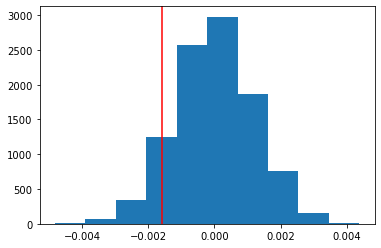

In [147]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [148]:
# Compute p-value
(null_vals > obs_diff).mean()

0.9079

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

P is greather than 5 %, we fail to reject the null hypotheses, it shows that there is higher probabaility for conversion to old page than the new page 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [149]:
import statsmodels.api as sm
from scipy.stats import norm

convert_old = df2.query("group == 'control' and converted == True").user_id.nunique()
convert_new = df2.query("group == 'treatment' and converted == True").user_id.nunique()
n_old = df2.query("landing_page == 'old_page'").user_id.nunique()
n_new = df2.query("landing_page == 'new_page'").user_id.nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [150]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [151]:
##z_score
z_score


-1.3109241984234394

In [152]:
##this value shows the significance of the z score
norm.cdf(z_score)

0.09494168724097551

In [153]:
##p_value
p_value


0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

the z score is located at the right side of the normal disrbution therefore we fail to reject the null hypothese which already agrees with our results on j and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

logistic regression 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [154]:
df2['intercept'] = 1


C:\Users\LAPTOP\AppData\Local\Temp/ipykernel_5680/1499032765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1


In [155]:
##create a dummy variable column for which page each user received
other =pd.get_dummies(df2['landing_page'])
df_new = df2.join(other, rsuffix='_other')
df_new.head()




,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [156]:
df_new['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [157]:
lm = sm.Logit(df_new['converted'], df_new[['intercept','ab_page']])
result = lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [158]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-04-16 21:55 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The P_value associated with ab_page is 0.1897 
the null hypotheses is that old page is same as new page, alternative hypotheses is there is some diffrence between the old page and new page
in partII its assumed that old page is better, unless new page proves this point wrong

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

other factors might be timestamp, it can be used as cateogerical value from weekend to weekdays, and the influence of this value on the decison of conversion 
drwabacks of adding other values to the regression model, it will be harder to interpret the model, it will be more complex

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [159]:
countries_df = pd.read_csv('./countries.csv')
df_new1 = countries_df.set_index('user_id').join(df_new.set_index('user_id'), how='inner')
df_new1.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [160]:
df_new1['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [161]:
### Create the necessary dummy variables
df_new1[['CA','UK','US']] = pd.get_dummies(df_new1['country'])
df_new1 = df_new1.drop(['CA'],axis=1)

In [162]:
df_new1.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,1,0


In [163]:
### Fit Your Linear Model And Obtain the Results
logit3 = sm.Logit(df_new1['converted'], df_new1[['intercept','new_page','UK','US']])
result = logit3.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2022-04-16 21:55 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
new_page      -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [164]:
1/np.exp(-0.0150),np.exp(0.0506),np.exp(0.0408)

(1.015113064615719, 1.0519020483004984, 1.0416437559600236)

 there is 1.5% more likely  conversion rate for every unit for new_page decrease, holding all other varible constant. 
 
 
 there is 5.2% more likely conversion rate for every unit for UK increase, holding all other varible constant.
 
 
 
there is 4.2% more likely conversion rate For every unit for US increases holding all other varible constant.

the P values are not statistically significant  as they are greater than 5%


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [165]:
#Create a new intereacton variable between new page and country US and UK
df_new1['UK_new_page'] = df_new1['new_page']* df_new1['UK']
df_new1['US_new_page'] = df_new1['new_page']* df_new1['US']

In [166]:
logit4 = sm.Logit(df_new1['converted'], df_new1[['intercept','new_page','UK_new_page','US_new_page','UK','US']])
result4 = logit4.fit()
result4.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-04-16 21:55 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
new_page      -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK_new_page    0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_new_page    0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
==================================================================

"""

In [167]:
np.exp(result4.params)

intercept      0.134794
new_page       0.934776
UK_new_page    1.081428
US_new_page    1.048001
UK             1.011854
US             1.017682
dtype: float64

Result Interpretation:

The coefficients of the interaction variables "UK new page" and "US new page" are different from the coefficient of new page itself, as seen in the preceding Logit Regression Results.

Furthermore, only the intercept's p-value is less than 0.05, indicating that the conversion rate is statistically significant. The summary's other variables aren't statistically significant.

Furthermore, the Z-scores for all X factors are too small to be useful in forecasting conversion rate.

As a result, the nation in which a user resides has no bearing on the conversion rate when considering the page in which the useer Convert will be 7.0 percent more likely to happen for every unit that new page reduces, assuming all other variables remain constant.

When all other variables are held constant, convert is 1.08 times more likely to happen for UK and new page users than for CA and new page users.


when all other variables are held constant, convert is 1.04 times more likely to happen for US and new page users than for CA and new page visitors.

<a id='conclusions'></a>
## Conclusions

in conculsion, we should keep the old page as it is, the conversion rate has no effect on the nationality of the users, in order to increase our sales another factors should be included like more marketing campaigns or huge sales, this will attract more prospect customers 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.